# Cryptocurrency Analysis

### Michael Olds




## Reading the Data

In [1]:
import numpy as np
import pandas as pd

# reading the data from the files
file_name1 = "All Cryptocurrencies Dataset.csv"  
file_name2 = "Price History Dataset.csv"
file_name3 = "Cryptocurrency Pairs Dataset.csv"
allCryptocurrency = pd.read_csv(file_name1)
priceHistory = pd.read_csv(file_name2)
cryptocurrencyPairs = pd.read_csv(file_name3)
allCryptocurrency.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


<b>



## Method 1: What are the historical trends of cryptocurrency (Bitcoin) prices?

In [2]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

priceHistory = priceHistory.sort_values(by = "Date")

priceHistory["Date"] = pd.to_datetime(priceHistory["Date"])

p = figure(title = "Historical Trends of Bitcoin Prices", 
           x_axis_label = "Date", 
           y_axis_label = "Price (USD)", 
           x_axis_type = "datetime", 
           plot_width=800, plot_height=400)

# Plot the line
p.line(priceHistory["Date"], priceHistory["Close"], line_width = 2)

# Add hover functionality
hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), ("Price", "@y{$0,0.00}")]
hover.formatters = {"@x": "datetime"}
p.add_tools(hover)

output_notebook()

# Display the plot
show(p)


Loading BokehJS ...

###### As shown in the graph above, Bitcoin, the most popular cryptocurrency, has historically experienced tremendous growth

### Creating Moving Averages of Bitcoin Prices

In [3]:
priceHistory["1 Month Moving Average"] = priceHistory["Close"].rolling(window = 30).mean()
priceHistory["1 Year Moving Average"] = priceHistory["Close"].rolling(window = 365).mean()

# create the layout of the plot
p = figure(title = "Historical Trends of Bitcoin Prices with Moving Averages", 
           x_axis_label = "Date", 
           y_axis_label = "Price (USD)", 
           x_axis_type = "datetime", 
           plot_width = 800, plot_height = 400)

# plot the price line
p.line(priceHistory["Date"], priceHistory["Close"], line_width = 2, color = "blue")

# plot the 1-month moving average
p.line(priceHistory["Date"], priceHistory["1 Month Moving Average"], line_width = 2, color = "green")

# plot the 1-year moving average
p.line(priceHistory["Date"], priceHistory["1 Year Moving Average"], line_width = 2, color = "red")

# add hover functionality with tooltips for all the lines
hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), 
                  ("Price", "@y{$0,0.00}")]
hover.formatters = {"@x": "datetime"}  # format x-axis as datetime
p.add_tools(hover)

# Output plot to the notebook
output_notebook()

# Display the plot
show(p)

Loading BokehJS ...

### Key Insights:

###### 1️⃣ Bitcoin's Price Has Experienced Massive Growth & Volatility
Early years (2013–2016): Prices remained relatively low with minor fluctuations.

2017 Bull Run: A rapid surge took Bitcoin past $20,000 before a sharp correction.

2020–2021 Boom: Prices skyrocketed past $60,000, followed by steep drops, showing extreme volatility.

###### 2️⃣ Moving Average (Red Line) Shows Long-Term Trends
The moving average smooths out short-term price fluctuations.

During bull runs, Bitcoin’s price (blue line) stays far above the moving average.

During crashes, price falls closer to or below the moving average, indicating market corrections.

###### 3️⃣ Bitcoin's Cyclical Nature
Bitcoin has repeated boom-and-bust cycles, suggesting it follows a pattern of rapid growth followed by corrections.

The recent drop after 2021 indicates a major correction phase, but past trends suggest potential future rebounds.

<b>
## Method 2: Which Cryptocurrencies have the Most Volatility?

In [4]:
# ensure "date" is in datetime format
allCryptocurrency["date"] = pd.to_datetime(allCryptocurrency["date"])

# sort data by cryptocurrency and date
allCryptocurrency = allCryptocurrency.sort_values(by=["name", "date"])

# calculate daily returns for each cryptocurrency
allCryptocurrency["daily_return"] = allCryptocurrency.groupby("name")["close"].pct_change()

# compute standard deviation of returns for each cryptocurrency
volatility = allCryptocurrency.groupby("name")["daily_return"].std().reset_index()
volatility.columns = ["Cryptocurrency", "Volatility"]

# sort by highest volatility
volatility = volatility.sort_values(by = 'Volatility', ascending = False)


## Volatility Formula


The standard deviation of daily returns ($\sigma$) is calculated as:

$$
\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (r_i - \bar{r})^2}
$$

where:  

- $r_i$ = daily return on day $i$, calculated as:  
  $$
  r_i = \frac{\text{Close}_i - \text{Close}_{i-1}}{\text{Close}_{i-1}}
  $$
- $\bar{r}$ = mean of all daily returns  
- $N$ = number of daily returns  
- $\sigma$ = standard deviation, representing volatility  


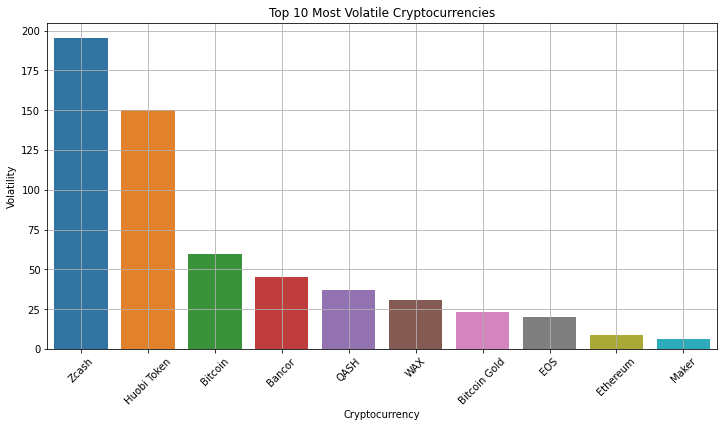

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 most volatile cryptocurrencies
top10Volatile = volatility.head(10)
top10Volatile
# Create a boxplot to visualize daily return distribution for the most volatile cryptos
plt.figure(figsize=(12, 6))
sns.barplot(x = "Cryptocurrency", y = "Volatility", data = top10Volatile)

# Customize plot
plt.xticks(rotation=45)
plt.title("Top 10 Most Volatile Cryptocurrencies")
plt.ylabel("Volatility")
plt.xlabel("Cryptocurrency")
plt.grid(True)

# Show the plot
plt.show()

### Key Insights:
###### 1️⃣ Zcash & Huobi Token Lead in Volatility
Zcash (ZEC) has the highest volatility, meaning it experiences the most dramatic price swings.

Huobi Token follows closely, indicating significant fluctuations in its market price.

###### 2️⃣ Bitcoin is Less Volatile Than Expected
While Bitcoin is known for price swings, it ranks third, behind Zcash and Huobi Token.

This suggests Bitcoin’s market is relatively more stable compared to the most volatile cryptos.

###### 3️⃣ Volatility Drops Quickly After the Top 2
Bancor, QASH, WAX, and Bitcoin Gold show moderate volatility but are significantly less volatile than Zcash and Huobi Token.

Ethereum & Maker are the least volatile among the top 10, indicating more price stability.

<b>

## Method 3: How do different cryptocurrencies correlate with each other in terms of price movements? 

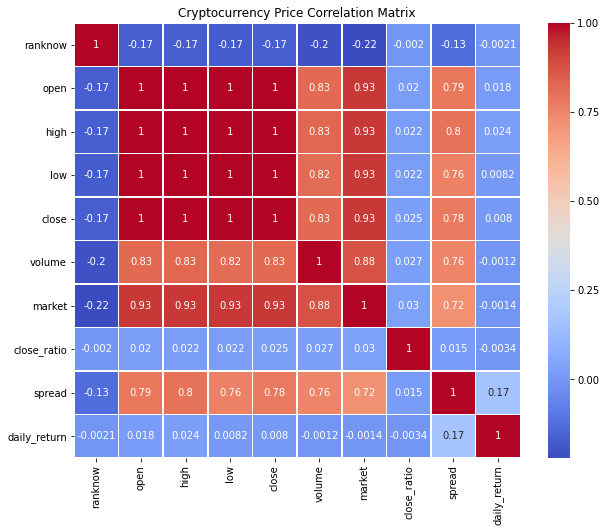

In [7]:
# create the correlation matrix of the variables
correlationMatrix = allCryptocurrency.corr(method = "pearson")

# create heatmap to show correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot = True, cmap = "coolwarm", linewidths = 0.5)

# Show plot
plt.title("Cryptocurrency Price Correlation Matrix")
plt.show()

### Key Insights:

###### 1️⃣ Price Metrics Move Together
Open, High, Low, and Close prices are strongly correlated (≈1). This means that if a cryptocurrency opens high, it likely closes high as well.

Market Cap & Volume (0.88 correlation): Cryptos with a larger market cap tend to have higher trading volume.

###### 2️⃣ Volatility & Spread Have a Weak Link to Price
Daily Returns & Spread (0.17 correlation): A wider spread (difference between bid and ask price) slightly increases daily returns, but the effect is weak.

Daily Returns & Other Price Metrics (~0 correlation): Returns do not strongly depend on opening, closing, or market cap—indicating potential price unpredictability.

###### 3️⃣ Rank Doesn’t Drive Price Trends
Rank (presumably based on market cap) has weak correlations (-0.2 to -0.17) with price metrics.



<b>

## Method 4: Can we predict the price of a cryptocurrency based on historical data and technical indicators?

Train on 2368 samples, validate on 593 samples
Epoch 1/10
2368/2368 [==============================] - 29s 12ms/sample - loss: 7.3309e-04 - val_loss: 0.0022
Epoch 2/10
2368/2368 [==============================] - 24s 10ms/sample - loss: 1.5888e-04 - val_loss: 0.0024
Epoch 3/10
2368/2368 [==============================] - 21s 9ms/sample - loss: 1.2519e-04 - val_loss: 0.0028
Epoch 4/10
2368/2368 [==============================] - 15s 6ms/sample - loss: 1.3134e-04 - val_loss: 0.0022
Epoch 5/10
2368/2368 [==============================] - 17s 7ms/sample - loss: 1.0569e-04 - val_loss: 0.0060
Epoch 6/10
2368/2368 [==============================] - 28s 12ms/sample - loss: 1.0576e-04 - val_loss: 0.0022
Epoch 7/10
2368/2368 [==============================] - 22s 9ms/sample - loss: 9.8138e-05 - val_loss: 0.0038
Epoch 8/10
2368/2368 [==============================] - 14s 6ms/sample - loss: 1.0194e-04 - val_loss: 0.0015
Epoch 9/10
2368/2368 [==============================] - 18s 8ms/sample - loss:

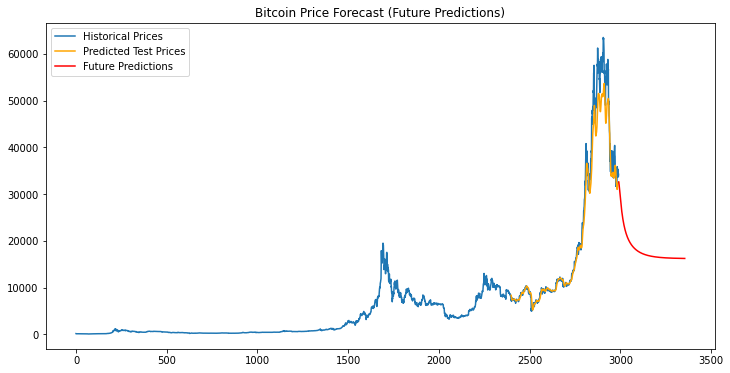

In [24]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


data = priceHistory[["Close"]].values  # using Closing price for prediction

# normalize data
scaler = MinMaxScaler(feature_range = (0, 1))
dataScaled = scaler.fit_transform(data)

# prepare data for LSTM
def createSequences(data, timeSteps=30):
    x, y = [], []
    for i in range(len(data) - timeSteps):
        x.append(data[i:i + timeSteps])
        y.append(data[i + timeSteps])
    return np.array(X), np.array(y)

timeSteps = 30  # predicting based on past 30 days
x, y = create_sequences(dataScaled, timeSteps)

# split into train and test sets
split = int(0.8 * len(X))
xTrain, xTest = x[:split], x[split:]
yTrain, yTest = y[:split], y[split:]

# build LSTM Model
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences = False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = Adam(learning_rate = 0.001), loss = "mean_squared_error")

# train the model
epochs = 10
batchSize = 32
history = model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs = epochs, batch_size = batchSize, verbose = 1)

# predictions
yPred = model.predict(xTest)
yPredRescaled = scaler.inverse_transform(yPred)
yTestRescaled = scaler.inverse_transform(yTest)


def predictFuturePrices(model, lastKnownData, numDays = 365):
    futurePredictions = []
    currentInput = lastKnownData  # start with the last known data (scaled)
    
    # predict future prices iteratively
    for _ in range(numDays):
        prediction = model.predict(currentInput)  # predict next price
        futurePredictions.append(prediction[0, 0])  # store the predicted price
        
        # reshape prediction to be compatible with the input shape and update the input for the next prediction
        predictionReshaped = prediction.reshape(1, 1, 1)  # shape it as (1, 1, 1)
        currentInput = np.append(currentInput[:, 1:, :], predictionReshaped, axis=1)  # shift window and add prediction
    
    return np.array(futurePredictions)

lastKnownData = xTest[-1:]  # last data point from the test set

# predict future prices (365 days ahead)
futurePredictions = predictFuturePrices(model, lastKnownData, numDays = 365)

# rescale future predictions back to the original price scale
futurePredictionsRescaled = scaler.inverse_transform(futurePredictions.reshape(-1, 1))

# plot the future predictions
plt.figure(figsize=(12,6))
plt.plot(range(len(data)), data, label="Historical Prices")  # plot historical data
plt.plot(range(len(data) - len(yTest), len(data)), yPredRescaled, label = "Predicted Test Prices", color = "orange")
plt.plot(range(len(data), len(data) + len(futurePredictions)), futurePredictionsRescaled, label="Future Predictions", color="red")
plt.legend()
plt.title("Bitcoin Price Forecast (Future Predictions)")
plt.show()


### Key Insights:


###### 1️⃣ Reasonable Fit on Recent History: 
The yellow line ("Predicted Test Prices") closely tracks the blue line ("Historical Prices") during the test period (the most recent segment of historical data shown). This indicates the model learned to replicate the recent price movements, including the significant volatility and the peak, reasonably well on data it hadn't explicitly trained on (but was part of the overall dataset split for validation/testing).

###### 2️⃣ Forecast Predicts a Decline: 
The red line ("Future Predictions") shows a clear downward trend immediately following the end of the historical data. After a period of high volatility and reaching a peak, the model predicts a significant drop in Bitcoin's price in the near future.

###### 3️⃣ Potential Model Instability/Overfitting: 
While the training loss consistently decreased over the 10 epochs, the validation loss (val_loss) fluctuated significantly (e.g., jumping to 0.0060 in Epoch 5, ending at 0.0027 which is higher than Epoch 1's 0.0022). This erratic validation loss suggests the model might not be generalizing perfectly and could be prone to overfitting or instability, potentially making the future predictions less reliable despite the good fit on the test set.